In [1]:
!pip3 install -U ucimlrepo 


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


In [2]:
from ucimlrepo import fetch_ucirepo 

# fetch dataset 
cdc_diabetes_health_indicators = fetch_ucirepo(id=891) 
  
# data (as pandas dataframes) 
X = cdc_diabetes_health_indicators.data.features 
y = cdc_diabetes_health_indicators.data.targets 
  
# metadata 
print(cdc_diabetes_health_indicators.metadata) 
  
# variable information 
print(cdc_diabetes_health_indicators.variables) 


{'uci_id': 891, 'name': 'CDC Diabetes Health Indicators', 'repository_url': 'https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators', 'data_url': 'https://archive.ics.uci.edu/static/public/891/data.csv', 'abstract': 'The Diabetes Health Indicators Dataset contains healthcare statistics and lifestyle survey information about people in general along with their diagnosis of diabetes. The 35 features consist of some demographics, lab test results, and answers to survey questions for each patient. The target variable for classification is whether a patient has diabetes, is pre-diabetic, or healthy. ', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Tabular', 'Multivariate'], 'num_instances': 253680, 'num_features': 21, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Sex', 'Age', 'Education Level', 'Income'], 'target_col': ['Diabetes_binary'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_

### Pre-Processing

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import resample

In [6]:
X

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1,1,1,40,1,0,0,0,0,1,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,25,1,0,0,1,0,0,...,0,1,3,0,0,0,0,7,6,1
2,1,1,1,28,0,0,0,0,1,0,...,1,1,5,30,30,1,0,9,4,8
3,1,0,1,27,0,0,0,1,1,1,...,1,0,2,0,0,0,0,11,3,6
4,1,1,1,24,0,0,0,1,1,1,...,1,0,2,3,0,0,0,11,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,1,1,1,45,0,0,0,0,1,1,...,1,0,3,0,5,0,1,5,6,7
253676,1,1,1,18,0,0,0,0,0,0,...,1,0,4,0,0,1,0,11,2,4
253677,0,0,1,28,0,0,0,1,1,0,...,1,0,1,0,0,0,0,2,5,2
253678,1,0,1,23,0,0,0,0,1,1,...,1,0,3,0,0,0,1,7,5,1


In [8]:
y

,Diabetes_binary
0,0
1,0
2,0
3,0
4,0
...,...
253675,0
253676,1
253677,0
253678,0


In [10]:
data = X.copy(deep=True)
data['Diabetes_binary'] = y
print(data['Diabetes_binary'].value_counts())

0    218334
1     35346
Name: Diabetes_binary, dtype: int64


In [18]:
data.isnull().sum()

HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
Diabetes_binary         0
dtype: int64

In [11]:
percentage_diabetes_0 = (data['Diabetes_binary'].value_counts()[0] / len(data)) * 100
percentage_diabetes_1 = (data['Diabetes_binary'].value_counts()[1] / len(data)) * 100

# Display the percentages
print("Percentage of Patients Without Diabetes :", percentage_diabetes_0, "%")
print("Percentage of Patients With Diabetes :", percentage_diabetes_1, "%")

Percentage of Patients Without Diabetes : 86.06669820245979 %
Percentage of Patients With Diabetes : 13.933301797540206 %


In [20]:
positive = data[data['Diabetes_binary'] == 1]
negative = data[data['Diabetes_binary'] == 0]

target_negative = int(len(positive) / 0.4 * 0.6)

negative_sample = negative.sample(target_negative).reset_index(drop=True)
balanced_data = pd.concat([positive, negative_sample]).reset_index(drop=True)
balanced_data = balanced_data.sample(frac=1).reset_index(drop=True)

print("Balanced Data Class Distribution:")
print(balanced_data['Diabetes_binary'].value_counts())

Balanced Data Class Distribution:
0    53019
1    35346
Name: Diabetes_binary, dtype: int64


In [22]:
percentage_positive = (balanced_data['Diabetes_binary'].value_counts()[1] / len(balanced_data)) * 100
percentage_negative = (balanced_data['Diabetes_binary'].value_counts()[0] / len(balanced_data)) * 100

print(f"Percentage of Patients With Diabetes : {percentage_positive:.2f}%")
print(f"Percentage of Patients Without Diabetes : {percentage_negative:.2f}%")

Percentage of Patients With Diabetes : 40.00%
Percentage of Patients Without Diabetes : 60.00%


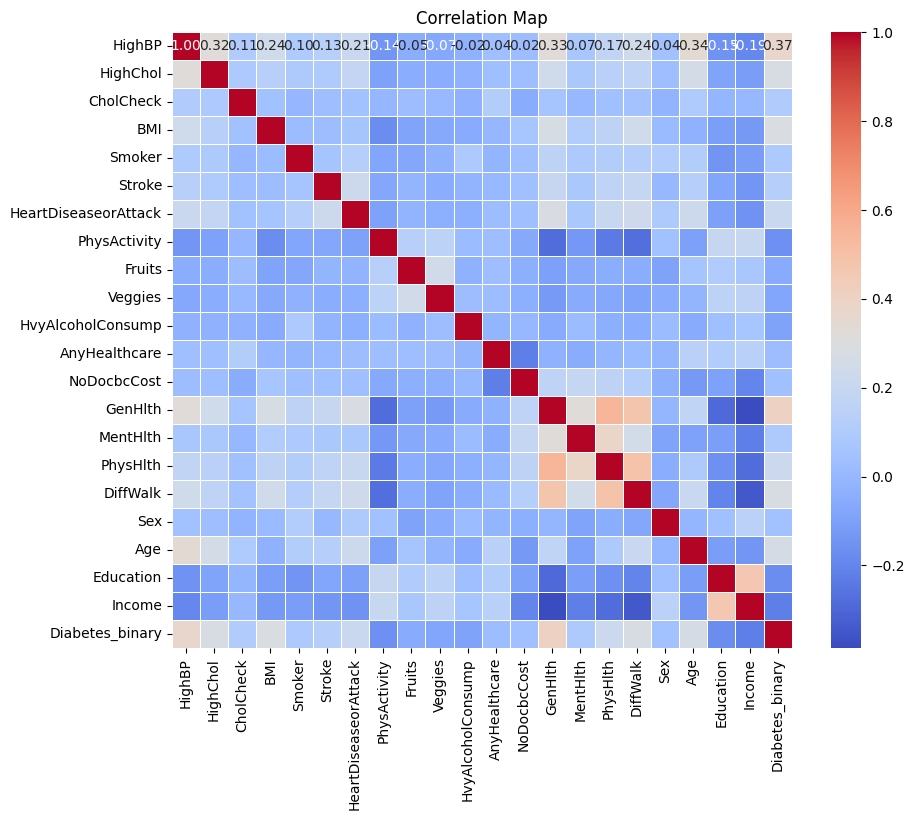

In [23]:
correlation_matrix = balanced_data.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Map')
plt.show()